![Cabec%CC%A7alho_notebook.png](cabecalho_notebook.png)

# Classificação de Atividade Humana com PCA

Vamos trabalhar com a base da demonstração feita em aula, mas vamos explorar um pouco melhor como é o desempenho da árvore variando o número de componentes principais.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier

from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import warnings;   warnings.filterwarnings("ignore")

filename_features = "../C:/Users/harle/Data-science/UCI HAR Dataset/features.txt"
filename_labels = "../C:/Users/harle/Data-science/UCI HAR Dataset/activity_labels.txt"

filename_subtrain = "../C:/Users/harle/Data-science/train/UCI HAR Dataset/train/subject_train.txt"
filename_xtrain = "../C:/Users/harle/Data-science/train/UCI HAR Dataset/train/X_train.txt"
filename_ytrain = "../C:/Users/harle/Data-science/train/UCI HAR Dataset/train/y_train.txt"

filename_subtest = "../C:/Users/harle/Data-science/test/UCI HAR Dataset/test/subject_test.txt"
ffilename_xtest = "../C:/Users/harle/Data-science/test/UCI HAR Dataset/test/X_test.txt"
filename_ytest = "../C:/Users/harle/Data-science/test/UCI HAR Dataset/test/y_test.txt"

features = pd.read_csv('features.txt', header=None, names=['nome_var'], squeeze=True, sep="#")
labels = pd.read_csv('activity_labels.txt', delim_whitespace=True, header=None, names=['cod_label', 'label'])

subject_train = pd.read_csv('subject_train.txt', header=None, names=['subject_id'], squeeze=True)
X_train = pd.read_csv('X_train.txt', delim_whitespace=True, header=None, names=features.tolist())
y_train = pd.read_csv('y_train.txt', header=None, names=['cod_label'])

subject_test = pd.read_csv('subject_test.txt', header=None, names=['subject_id'], squeeze=True)
X_test = pd.read_csv('X_test.txt', delim_whitespace=True, header=None, names=features.tolist())
y_test = pd.read_csv('y_test.txt', header=None, names=['cod_label'])

## PCA com variáveis padronizadas

Reflexão sobre a escala das variáveis:

**Variáveis em métricas muito diferentes** podem interferir na análise de componentes principais. Lembra que variância é informação pra nós? Pois bem, tipicamente se há uma variável monetária como salário, vai ter uma ordem de variabilidade bem maior que número de filhos, tempo de emprego ou qualquer variável dummy. Assim, as variáveis de maior variância tendem a "dominar" a análise. Nesses casos é comum usar a padronização das variáveis.

Faça duas análises de componentes principais para a base do HAR - com e sem padronização e compare:

- A variância explicada por componente
- A variância explicada acumulada por componente
- A variância percentual por componente
- A variância percentual acumulada por componente
- Quantas componentes você escolheria, em cada caso para explicar 90% da variância?

In [22]:
%%time

def padroniza(s):
    if s.std() > 0:
        s = (s - s.mean())/s.std()
    return s

X_train_pad = pd.DataFrame(X_train).apply(padroniza, axis=0)
X_train_pad.head()

CPU times: total: 219 ms
Wall time: 217 ms


,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,552 fBodyBodyGyroJerkMag-meanFreq(),553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)"
0,0.200628,-0.063678,-0.419600,-0.868755,-0.939377,-0.737479,-0.859758,-0.938955,-0.766385,-0.855978,...,-0.795305,0.025958,-0.276380,-0.360579,0.062935,-0.778374,-0.026079,-0.687172,0.407918,-0.007567
1,0.055944,0.031484,-0.253891,-0.875366,-0.923839,-0.849247,-0.868472,-0.921936,-0.848870,-0.871300,...,0.130605,-0.897296,-0.767938,0.133002,-0.021460,-1.218722,1.484369,-0.694091,0.409089,0.007875
2,0.073510,-0.043414,-0.076289,-0.868980,-0.907698,-0.893724,-0.863078,-0.898793,-0.896640,-0.863264,...,1.152257,-0.260860,-0.438286,-0.377815,0.391949,0.151197,1.704085,-0.702191,0.410260,0.026501
3,0.066691,-0.208407,-0.249695,-0.870566,-0.939959,-0.921743,-0.864445,-0.938060,-0.925216,-0.863264,...,1.112694,0.591005,0.463123,-0.135016,-0.033635,1.037781,-1.002951,-0.701636,0.414622,0.031712
4,0.030467,0.027585,-0.109840,-0.875128,-0.934815,-0.921281,-0.867325,-0.931726,-0.927965,-0.870201,...,-0.149567,-0.138505,-0.240296,0.340383,0.268468,1.125841,-1.276196,-0.700104,0.425434,0.045222


In [29]:
%%time
pca_X_train = PCA().fit(X_train)

CPU times: total: 1.03 s
Wall time: 210 ms


In [30]:
%%time
pca_X_train_pad = PCA().fit(X_train_pad)

CPU times: total: 891 ms
Wall time: 216 ms


In [31]:
print(pca_X_train.explained_variance_[0:10])
print("")
print(pca_X_train.explained_variance_.cumsum()[0:10])
print("")
print(pca_X_train.explained_variance_ratio_[0:10])
print("")
print(pca_X_train.explained_variance_ratio_.cumsum()[0:10])

[34.82363041  2.73504627  2.29439284  1.04377529  0.943517    0.7081523
  0.6550526   0.59509008  0.53964712  0.47765287]

[34.82363041 37.55867667 39.85306951 40.89684481 41.84036181 42.54851411
 43.20356671 43.79865679 44.3383039  44.81595677]

[0.6255444  0.04913023 0.04121467 0.01874956 0.0169486  0.01272069
 0.01176685 0.01068973 0.0096938  0.00858018]

[0.6255444  0.67467463 0.7158893  0.73463886 0.75158746 0.76430816
 0.77607501 0.78676474 0.79645854 0.80503872]


In [32]:
print(pca_X_train_pad.explained_variance_[0:10])
print("")
print(pca_X_train_pad.explained_variance_.cumsum()[0:10])
print("")
print(pca_X_train_pad.explained_variance_ratio_[0:10])
print("")
print(pca_X_train_pad.explained_variance_ratio_.cumsum()[0:10])

[284.88237655  36.9176163   15.74411031  14.0471749   10.59327893
   9.67167599   7.69137434   6.72682578   5.58677186   5.41413577]

[284.88237655 321.79999285 337.54410316 351.59127806 362.18455699
 371.85623299 379.54760733 386.27443311 391.86120496 397.27534074]

[0.50781172 0.0658068  0.02806437 0.02503953 0.01888285 0.01724006
 0.01371011 0.01199078 0.0099586  0.00965087]

[0.50781172 0.57361853 0.60168289 0.62672242 0.64560527 0.66284534
 0.67655545 0.68854623 0.69850482 0.70815569]


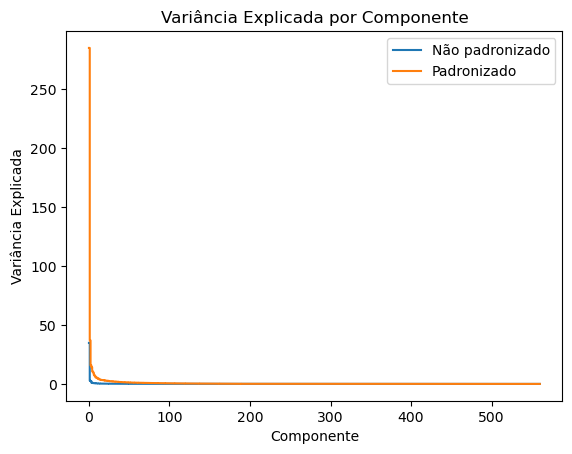

In [33]:
fig, ax = plt.subplots()
ax.set_xlabel("Componente")
ax.set_ylabel("Variância Explicada")
ax.set_title("Variância Explicada por Componente")
ax.plot(pca_X_train.explained_variance_, label="Não padronizado", drawstyle="steps-post")
ax.plot(pca_X_train_pad.explained_variance_, label="Padronizado", drawstyle="steps-post")

ax.legend()
plt.show()

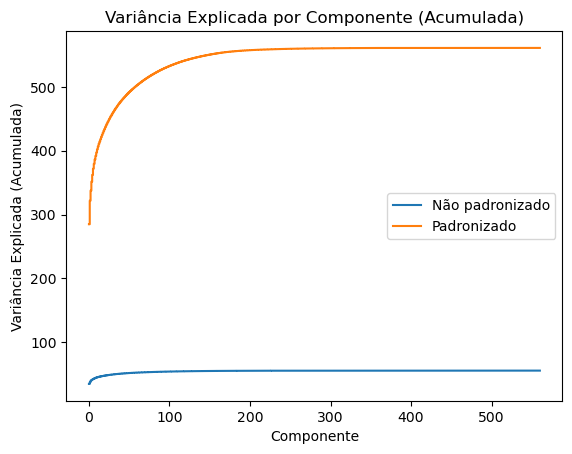

In [34]:
fig, ax = plt.subplots()
ax.set_xlabel("Componente")
ax.set_ylabel("Variância Explicada (Acumulada)")
ax.set_title("Variância Explicada por Componente (Acumulada)")
ax.plot(pca_X_train.explained_variance_.cumsum(), label="Não padronizado", drawstyle="steps-post")
ax.plot(pca_X_train_pad.explained_variance_.cumsum(), label="Padronizado", drawstyle="steps-post")

ax.legend()
plt.show()

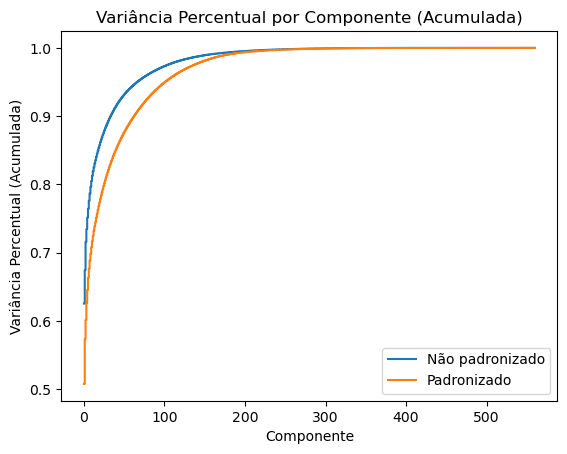

In [35]:
fig, ax = plt.subplots()
ax.set_xlabel("Componente")
ax.set_ylabel("Variância Percentual (Acumulada)")
ax.set_title("Variância Percentual por Componente (Acumulada)")
ax.plot(pca_X_train.explained_variance_ratio_.cumsum(), label="Não padronizado",    drawstyle="steps-post")
ax.plot(pca_X_train_pad.explained_variance_ratio_.cumsum(), label="Padronizado", drawstyle="steps-post")

ax.legend()
plt.show()

In [36]:
ncomp_crit = (pca_X_train.explained_variance_ratio_.cumsum() < .90).sum()+1

print(f'Número de componentes para dados não padronizados: {ncomp_crit}')

Número de componentes para dados não padronizados: 34


In [37]:
ncomp_crit = (pca_X_train_pad.explained_variance_ratio_.cumsum() < .90).sum()+1

print(f'Número de componentes para dados padronizados: {ncomp_crit}')

Número de componentes para dados padronizados: 63


## Árvore com PCA

Faça duas uma árvore de decisão com 10 componentes principais - uma com base em dados padronizados e outra sem padronizar. Utilize o ```ccp_alpha=0.001```.

Compare a acurácia na base de treino e teste.

In [38]:
%%time

pc_treino = pca_X_train.transform(X_train)
pc_teste = pca_X_train.transform(X_test)

n = 10

colunas = ['cp'+str(x+1) for x in list(range(n))]

pc_train = pd.DataFrame(pc_treino[:, :n], columns=colunas)
pc_test = pd.DataFrame(pc_teste[:, :n], columns=colunas)

clf = DecisionTreeClassifier(random_state=1234, ccp_alpha=0.001).fit(pc_train, y_train)

acc_treino = clf.score(pc_train, y_train)
acc_teste = clf.score(pc_test, y_test)

print(f'A acurácia na base de treino sem padronização é: {acc_treino*100:.2f}%')
print(f'A acurácia na base de teste sem padronização é: {acc_teste*100:.2f}%')

A acurácia na base de treino sem padronização é: 89.27%
A acurácia na base de teste sem padronização é: 82.42%
CPU times: total: 656 ms
Wall time: 189 ms


In [39]:
%%time

pc_treino_pad = pca_X_train_pad.transform(X_train)
pc_teste_pad = pca_X_train_pad.transform(X_test)

n = 10

colunas = ['cp'+str(x+1) for x in list(range(n))]

pc_train_pad = pd.DataFrame(pc_treino_pad[:, :n], columns=colunas)
pc_test_pad = pd.DataFrame(pc_teste_pad[:, :n], columns=colunas)

clf_pad = DecisionTreeClassifier(random_state=1234, ccp_alpha=0.001).fit(pc_train_pad, y_train)

acc_treino_pad = clf_pad.score(pc_train_pad, y_train)
acc_teste_pad = clf_pad.score(pc_test_pad, y_test)

print(f'A acurácia base de treino com padronização é: {acc_treino_pad*100:.2f}%')
print(f'A acurácia base de teste com padronização é: {acc_teste_pad*100:.2f}%')

A acurácia base de treino com padronização é: 87.79%
A acurácia base de teste com padronização é: 80.62%
CPU times: total: 531 ms
Wall time: 216 ms


In [40]:
print(f"A acurácia da base de treino padronizada foi {((acc_treino - acc_treino_pad) / acc_treino_pad)*100:.2f}% menor comparada a base sem padronização.")
print("")
print(f"A acurácia da base de teste padronizada foi {((acc_teste - acc_teste_pad) / acc_teste_pad)*100:.2f}% menor comparada a base sem padronização.")

A acurácia da base de treino padronizada foi 1.69% menor comparada a base sem padronização.

A acurácia da base de teste padronizada foi 2.23% menor comparada a base sem padronização.
